Saved results to Q2_spotify_2017.csv


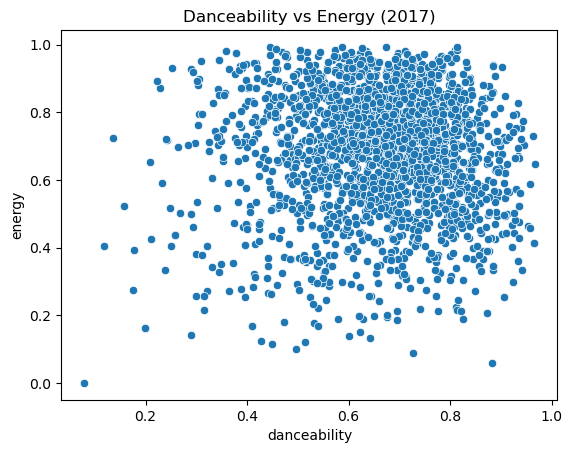

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prompt the system to read the file
file_path = 'spotify.csv'
sp = pd.read_csv(file_path)

# Convert 'track_album_release_date' to datetime
sp['track_album_release_date'] = pd.to_datetime(sp['track_album_release_date'], format='mixed')

# Find the data by filtering data for the year 2017
sp_2017 = sp[sp['track_album_release_date'].dt.year == 2017]

# Count average values for each of the selected tables
avg_by_genre = sp_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000  # Convert duration from ms to minutes
}).reset_index()

# Rename columns to include "_average
avg_by_genre.columns = ['playlist_genre'] + [f'{col}_average' for col in avg_by_genre.columns[1:]]

# Save the results to a CSV file
output_file = 'Q2_spotify_2017.csv'
avg_by_genre.to_csv(output_file, index=False)
print(f'Saved results to {output_file}')


# Plot the relationship between danceability and energy
sns.scatterplot(x='danceability', y='energy', data=sp_2017)
plt.title('Danceability vs Energy (2017)')
plt.show()

# Investigation the relationship between danceabilitiy and energy and other factors that may influence danceability and energy
correlation_matrix = sp_2017[['danceability', 'energy', 'loudness', 'speechiness', 
                              'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
plt.show()
